# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
netflix_titles = pd.read_csv('data/netflix_titles.csv')
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_titles.shape

(7787, 12)

In [4]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


There are some missing values. Some of them are consider as Unknown data.

# Cleaning the Data

Country: Some shows have (1) multiple countries and (2) some shows have Nan as values for countries.

For 1, we will select the first country within the list.

For 2, we will insert unknown for these shows.

In [5]:
netflix_titles['country'] = netflix_titles['country'].fillna('Unknown')
netflix_titles['country'] = [countries[0] for countries in netflix_titles['country'].str.split(',')]
netflix_titles['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland', 'Thailand', 'Nigeria', 'Unknown',
       'Norway', 'United Kingdom', 'Japan', 'South Korea', 'Italy',
       'Canada', 'Indonesia', 'Romania', 'Spain', 'Iceland',
       'South Africa', 'France', 'Portugal', 'Hong Kong', 'Argentina',
       'Germany', 'Denmark', 'Kenya', 'New Zealand', 'Pakistan',
       'Australia', 'China', 'Taiwan', 'Netherlands', 'Philippines',
       'United Arab Emirates', 'Iran', 'Israel', 'Uruguay', 'Bulgaria',
       'Mauritius', 'Lebanon', 'Colombia', 'Soviet Union', 'Sweden',
       'Malaysia', 'Ireland', 'Serbia', 'Finland', 'Peru', 'Chile',
       'Ghana', 'Saudi Arabia', 'Namibia', 'Russia', 'Belgium', 'Vietnam',
       'Kuwait', 'Czech Republic', 'Zimbabwe', 'Hungary', 'Venezuela',
       'Cambodia', 'Austria', 'West Germany', 'Slovenia', 'Switzerland',
       'Jordan', 'Bangladesh', 'Georgia', 'Puerto Rico', 'Senegal',
       'Guatemala', 'Ukraine', 'Ja

Dates: Some information classified as object but are infact dates... will need to change these.

In [6]:
netflix_titles['release_year'] = netflix_titles['release_year'].astype(str)
netflix_titles['release_year'] = pd.to_datetime(netflix_titles['release_year'])
netflix_titles['release_year'].dt.year

0       2020
1       2016
2       2011
3       2009
4       2008
        ... 
7782    2005
7783    2015
7784    2019
7785    2019
7786    2019
Name: release_year, Length: 7787, dtype: int64

Ratings: Within the ratings column, UR, NR and technically Nan have the same meaning (unrated and non rated). Am going to replace all with UR.

In [7]:
netflix_titles['rating'] = netflix_titles['rating'].replace('NR','UR')
netflix_titles['rating'] = netflix_titles['rating'].fillna('UR')
netflix_titles['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'UR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

Duration: The duration for TV Shows are in Seasons, but it is in min for Movies. Only the number of each row will selected:

In [8]:
netflix_titles['duration'] = [int(duration[0]) for duration in netflix_titles['duration'].str.split(' ')]
netflix_titles['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7787, dtype: int64

Director and Cast: Note that some of cells in the Director, Cast and Date_Added columns are empty, will fill them with Unknown.

In [9]:
netflix_titles['director'] = netflix_titles['director'].fillna('Unknown')
netflix_titles['cast'] = netflix_titles['cast'].fillna('Unknown')

Date added: Dont really need to know month and date of when the show was added to their library - lets just focus on year.

In [10]:
netflix_titles["year"]= netflix_titles.date_added.apply(lambda x: str(x).split(",")[-1])

In [11]:
netflix_titles["year"].value_counts()

 2019    2153
 2020    2009
 2018    1685
 2017    1225
 2016     443
 2021     117
 2015      88
 2014      25
 2011      13
 2013      11
nan        10
 2012       3
 2008       2
 2009       2
 2010       1
Name: year, dtype: int64

Date_added: Going to fill missing values within Date_Added with Unknown

In [12]:
netflix_titles.date_added.fillna("Unknown",inplace= True)

In [23]:
netflix_titles.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
dtype: int64

In [28]:
netflix_titles['show_id'].unique
#There are 7787 different shows within the library (note that TV series Seasons are regarded as 1)

<bound method Series.unique of 0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
7782    s7783
7783    s7784
7784    s7785
7785    s7786
7786    s7787
Name: show_id, Length: 7787, dtype: object>

## What i know
(1) Total number of shows in the Netflix library - split by TV Shows and Movies.

(2) The categories these shows have been placed into and their respective ratings.

(3) The duration of these shows.

(4) When these shows were released and when they were added into the library.

(5) The country these shows were from.

(6) A short description of these shows.

## What i do not know
(1) How good these movies are.

(2) How many views these movies have gotten since getting into the library?

(3) How much these movies had cost to be produced?

# Problem Statements
(1) What is the breakdown of TV Shows and Movies on Netflix?

(2) How many shows have Netflix added onto thier library over the years?

(3) What is the breakdown of shows by year of release?

(4) How has Netflix curated their offerings - by categories and by ratings? Who does their library appeal to?

(5) What is the average length of a show on Netflix? - for TV Shows (by Seasons) for Movies (by minutes)

(6) Where does most of Netflix's show come from?

## Answering Point 1:

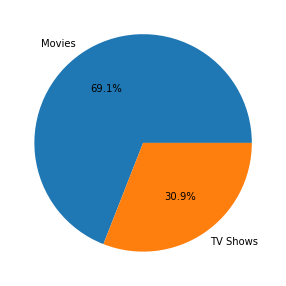

In [14]:
#What is the breakdown of TV Shows and Movies on Netflix?
plt.figure(figsize=(5,5))
TypesBreakdown=netflix_titles.type.value_counts()
plt.pie(TypesBreakdown.values,labels=["Movies","TV Shows"],autopct="%1.1f%%");

## Answering Point 2:

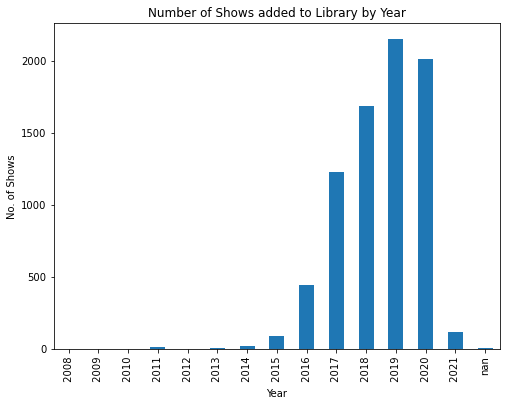

In [15]:
#How many shows have Netflix added onto thier library over the years?
plt.figure(figsize=(8,6))
netflix_titles['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No. of Shows')
plt.title('Number of Shows added to Library by Year');

## Answering Point 3

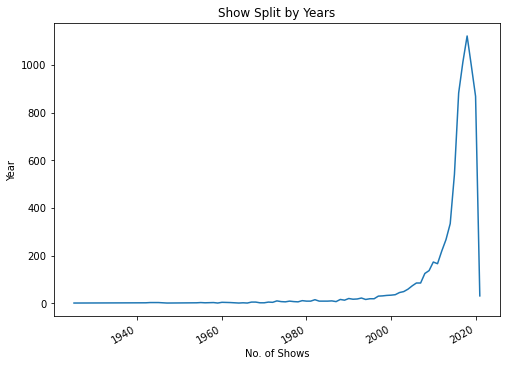

In [16]:
#What is the breakdown of shows by year of release?
plt.figure(figsize=(8,6))
netflix_titles['release_year'].value_counts().sort_index().plot()
plt.xlabel('No. of Shows')
plt.ylabel('Year')
plt.title('Show Split by Years');

## Answering Point 4

Netflix focus from a Ratings perspective

In [17]:
netflix_titles['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'UR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

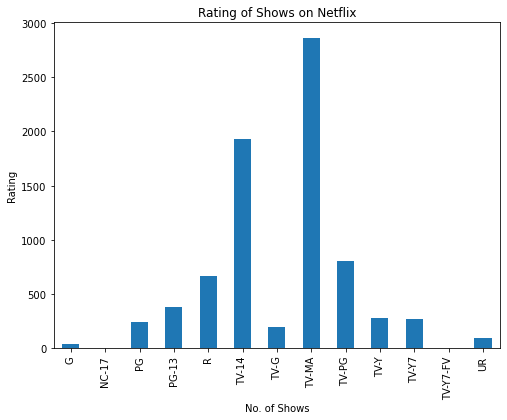

In [18]:
plt.figure(figsize=(8,6))
netflix_titles['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('No. of Shows')
plt.ylabel('Rating')
plt.title('Rating of Shows on Netflix');

Note: Most of the content on Netflix is for Mature Audiences (TV-MA), followed by TV-14 (Parents strongly cautioned).

Kids friendly: 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG'

Teens focused: 'PG-13', 'TV-14'

Adults focused: 'R', 'NC-17', 'TV-MA' 

Unclassified: 'UR'

Netflix focus from a Genre perspective

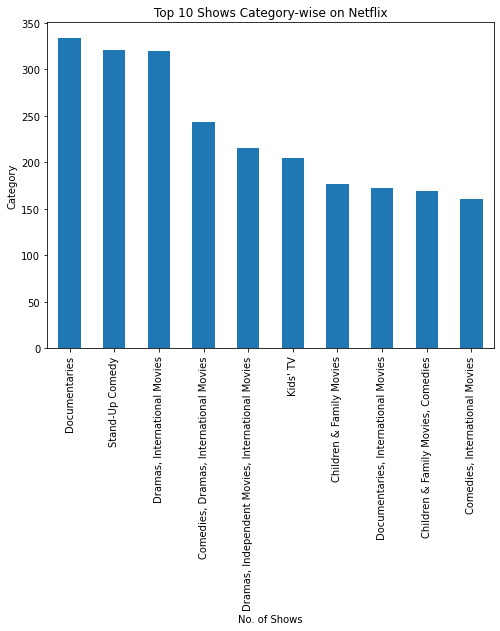

In [19]:
plt.figure(figsize=(8,6))
netflix_titles['listed_in'].value_counts().head(10).plot(kind='bar')
plt.xlabel('No. of Shows')
plt.ylabel('Category')
plt.title('Top 10 Shows Category-wise on Netflix');

## Answering Point 5

In [20]:
#What is the average length of a show on Netflix? - for TV Shows (by Seasons) for Movies (by minutes)

ax = netflix_titles.groupby('type')['duration'].mean()
ax1 = netflix_titles.groupby('type')['duration'].max()
ax2 = netflix_titles.groupby('type')['duration'].min()
print(ax)
print(ax1)
print(ax2)

type
Movie      99.307978
TV Show     1.775934
Name: duration, dtype: float64
type
Movie      312
TV Show     16
Name: duration, dtype: int64
type
Movie      3
TV Show    1
Name: duration, dtype: int64


Movie: Min is 3 minutes; Average is 99.3 minutes; Max is 312 minutes.

TV Show: Min is 1 season; Average is 1.78 season; Max is 16 seasons.

In [32]:
netflix_titles[netflix_titles.type=='Movie'].sort_values(by='duration', ascending=False).head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
957,s958,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018-01-01,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973-01-01,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979-01-01,TV-14,237,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,2020


Longest Movie is Black Mirror: Bandersnatch

In [33]:
netflix_titles[netflix_titles.type=='TV Show'].sort_values(by='duration', ascending=False).head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
2538,s2539,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"May 9, 2020",2019-01-01,TV-14,16,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020
4438,s4439,TV Show,NCIS,Unknown,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017-01-01,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,2018
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,"June 5, 2020",2019-01-01,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",2020


Longest Series on Netflix is Grey's Anatomy

## Answering point 6

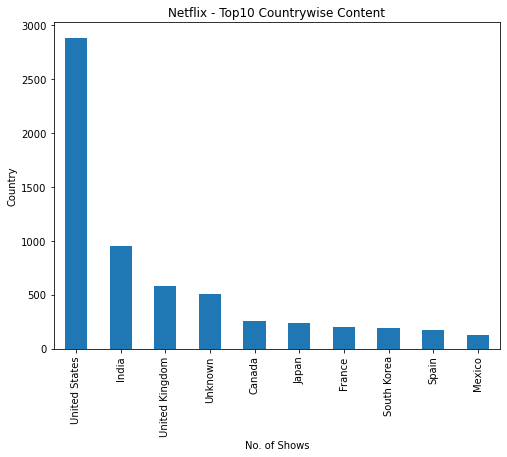

In [19]:
#Where does most of Netflix's show come from?

plt.figure(figsize=(8,6))
netflix_titles['country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('No. of Shows')
plt.ylabel('Country')
plt.title('Netflix - Top10 Countrywise Content');